## 모델 평가

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#RMSE : root mean squared error함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

#MAPE: mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) *100




matplotlib.rc('font', family='NanumBarunGothic')

matplotlib.rc('axes', unicode_minus=False)

df=pd.read_csv("체질검사.csv", encoding='euc-kr')

In [2]:
#단위와 같이 표현되어 있는 수치형 변수 처리
df[['WEIGHT', 'WEIGHT_UNIT']]=df['WEIGHT'].str.split(expand=True)
df[['HEIGHT', 'HEIGHT_UNIT']]=df['HEIGHT'].str.split(expand=True)
df['HEIGHT']=df['HEIGHT'].astype('float64')
df['WEIGHT']=df['WEIGHT'].astype('float64')
#단위를 나타내는 항목 제외
df=df.drop(['WEIGHT_UNIT', 'HEIGHT_UNIT'], axis=1)
#범주형 변수의 Dummy 변수화
df_dummy=pd.get_dummies(df, drop_first=True)
#dummy의 상관관계를 소수점3쨰자리까지 출력 
df_dummy
#데이터 구성, 목표변수,설명변수 설정
df_y=df_dummy["FAT"]
df_x=df_dummy.drop("FAT", axis=1, inplace=False)

In [3]:
#train data= 0.4 , test data= 0.6 , train_test_split 사용
df_train, df_test= train_test_split(df_dummy, test_size=0.3, random_state=1234)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (176, 15)
test data size : (76, 15)


In [4]:
#데이터 분할
#train : test= 7: 3 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=1234)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(176, 14)
train data Y size :(176,)
test data X size :(76, 14)
test data Y size :(76,)


In [5]:
#회귀모델
lr_model= smf.ols(formula = "FAT ~ HEIGHT + NECK + ABDOMEN + HIP + FOREARM", data= df_train)
lr_result=lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     102.3
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           2.18e-49
Time:                        16:17:16   Log-Likelihood:                -501.89
No. Observations:                 176   AIC:                             1016.
Df Residuals:                     170   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7817      7.302      0.381      0.7

In [6]:
#Decision Tree
dt_model=DecisionTreeRegressor(random_state=1234, min_samples_leaf =8, min_samples_split=20, max_depth=4)
dt_model.fit(df_train_x, df_train_y)
#Random Forest
rf_model=RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf=6, min_samples_split=14, max_depth=4)
rf_model.fit(df_train_x, df_train_y)
#Gradient Boosting
gb_model=GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=11, min_samples_split=22, max_depth=4, learning_rate=0.1)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [7]:

#모델 리스트, 그래프를 그리기 생성목적
models=["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
#평가 리스트 초기화
mse, rmse, mae, mape=[],[],[],[]

####회귀분석
#예측
lr_y_pred=dt_model.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test['FAT'],lr_y_pred))
rmse.append(root_mean_squared_error(df_test['FAT'], lr_y_pred))
mae.append(mean_absolute_error(df_test['FAT'], lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['FAT'], lr_y_pred))

#의사결정나무 
#예측
dt_y_pred=dt_model.predict(df_test_x)

matplotlib.rc('axes', unicode_minus=False)

df=pd.read_csv("체질검사.csv", encoding='euc-kr')
#평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

#랜덤 포레스트
#예측
rf_y_pred=rf_model.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

#그래디언트 부스팅
#예측
gb_y_pred=gb_model.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

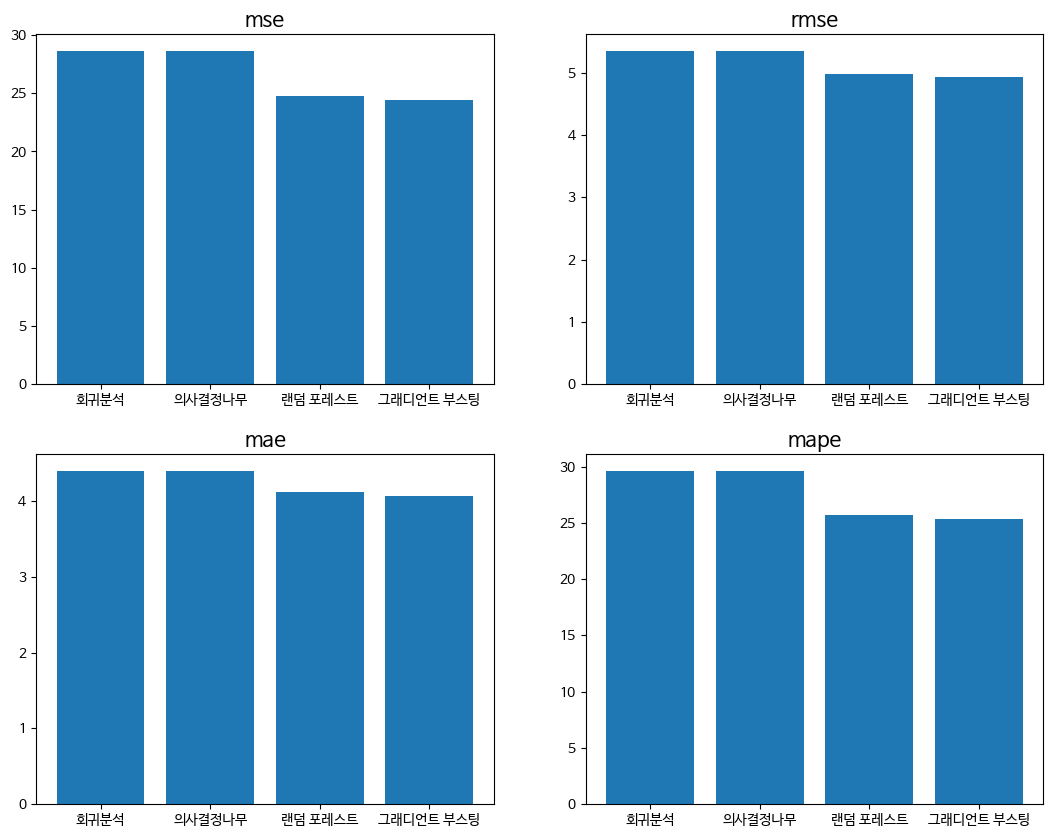

In [8]:
#시각화, 평가
fig, ax= plt.subplots(2,2, figsize=(13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)


## 주성분분석(PCA)

In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
matplotlib.rc('font', family='NanumBarunGothic')

matplotlib.rc('axes', unicode_minus=False)
#데이터 분리(Y,Xs) ->설명변수를 이용한 주성분 분석
df=pd.read_csv("직무능력평가.csv", encoding='euc-kr')
df_x=df.drop("EVAL",axis=1)
df_y=df["EVAL"]
df_y.head()
df_x.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47


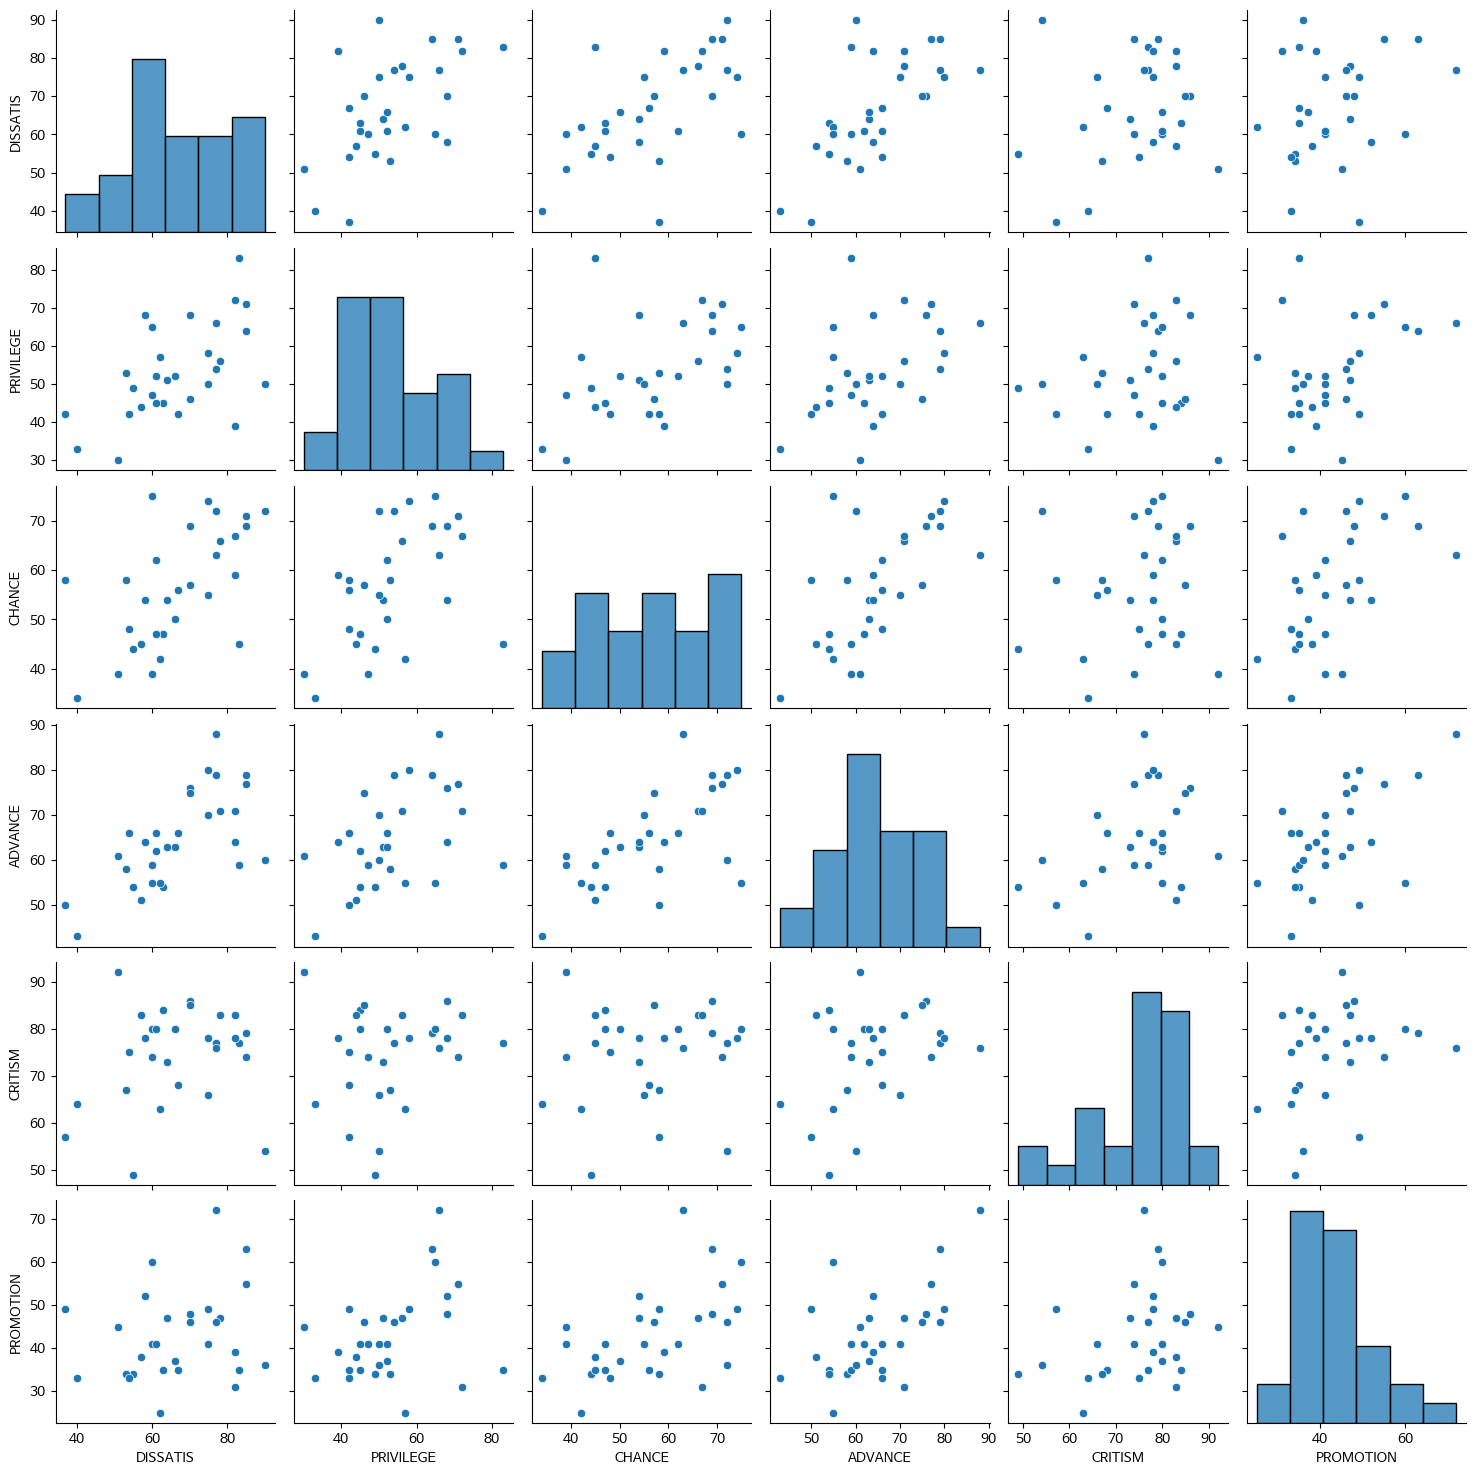

In [10]:
sns.pairplot(df_x)

In [11]:
df_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


In [12]:
#요약 통계량 ->Scale변환 필요 확인
df_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [13]:
#변수 이름저장
x_cols=df_x.columns
#Scale 변환: ndarray형식
scaler=StandardScaler()
nd_scaled=scaler.fit_transform(df_x)
#변환된 데이터 및 형태 확인
print("Scaled Data:\n {}".format(nd_scaled[:5].round(3)))
print("Shape :\n{}".format(nd_scaled.shape))

Scaled Data:
 [[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape :
(30, 6)


In [14]:
#DataFrame으로 저장
df_scaled=pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [15]:
#주성분 분석: 주성분1(Prin1)~주성분6(Prin6) 생성 및 저장
pca=PCA(n_components=6)
nd_pca=pca.fit_transform(df_scaled)
#생성된 주성분 점수 확인
print("PCA Data :\n {}".format(nd_pca[:5]))
#생성된 주성분 점수 row, column 개수 확인
print("Shape :\n {}".format(nd_pca.shape))

PCA Data :
 [[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape :
 (30, 6)


In [16]:
#주성분 점수 저장(Prin1~Prin6, DataFrame형식) 및 확인
df_pca=pd.DataFrame(nd_pca, columns= ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])
#주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca=df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [17]:
#주성분 분석 통계량 저장: 주성분 번호, Eigenvalue, Eigenvalue ratio
df_pca_stat=pd.DataFrame()
df_pca_stat["PrinNo"]=[I for I in range(1,7)]
df_pca_stat["EigenValues"]=pca.explained_variance_
df_pca_stat["EigenValueRatio"]=pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"]=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)
                                            



,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


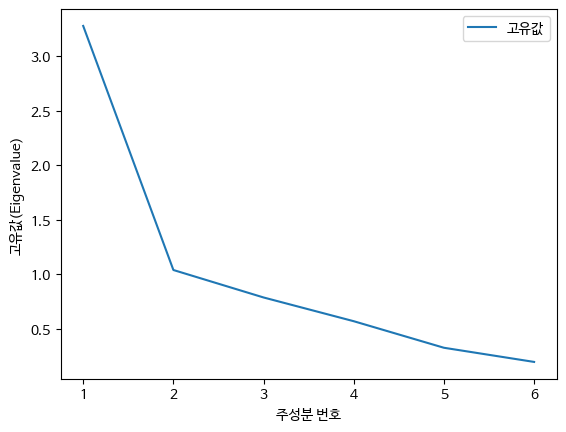

In [18]:
#screen plot
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label="고유값")
#그래프 label, legend설정
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

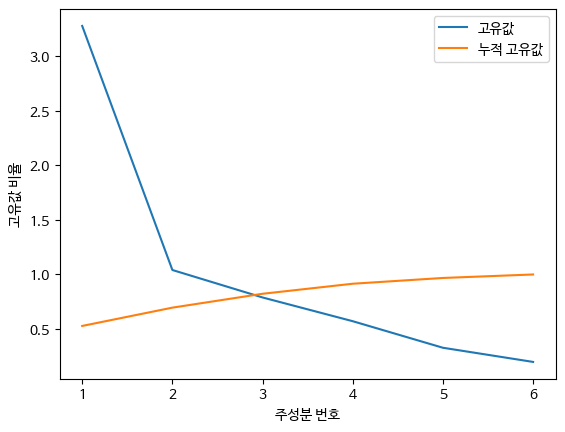

In [19]:
#고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label="고유값")
#누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"], label="누적 고유값")
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

In [20]:
#주성분 분석 데이터의 변수 이름
x_cols=pd.DataFrame({"Feature":df_x.columns})
#주성분 Prin 1~6까지의 고유벡터 저장
#전치 결과 pd.DataFrame(pca.components_, columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])], axis=1)
#파이썬 PCA분석 시 SVD 연산 방식의 차이 반영(전치, 부호 변경)
df_eigenvector=pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


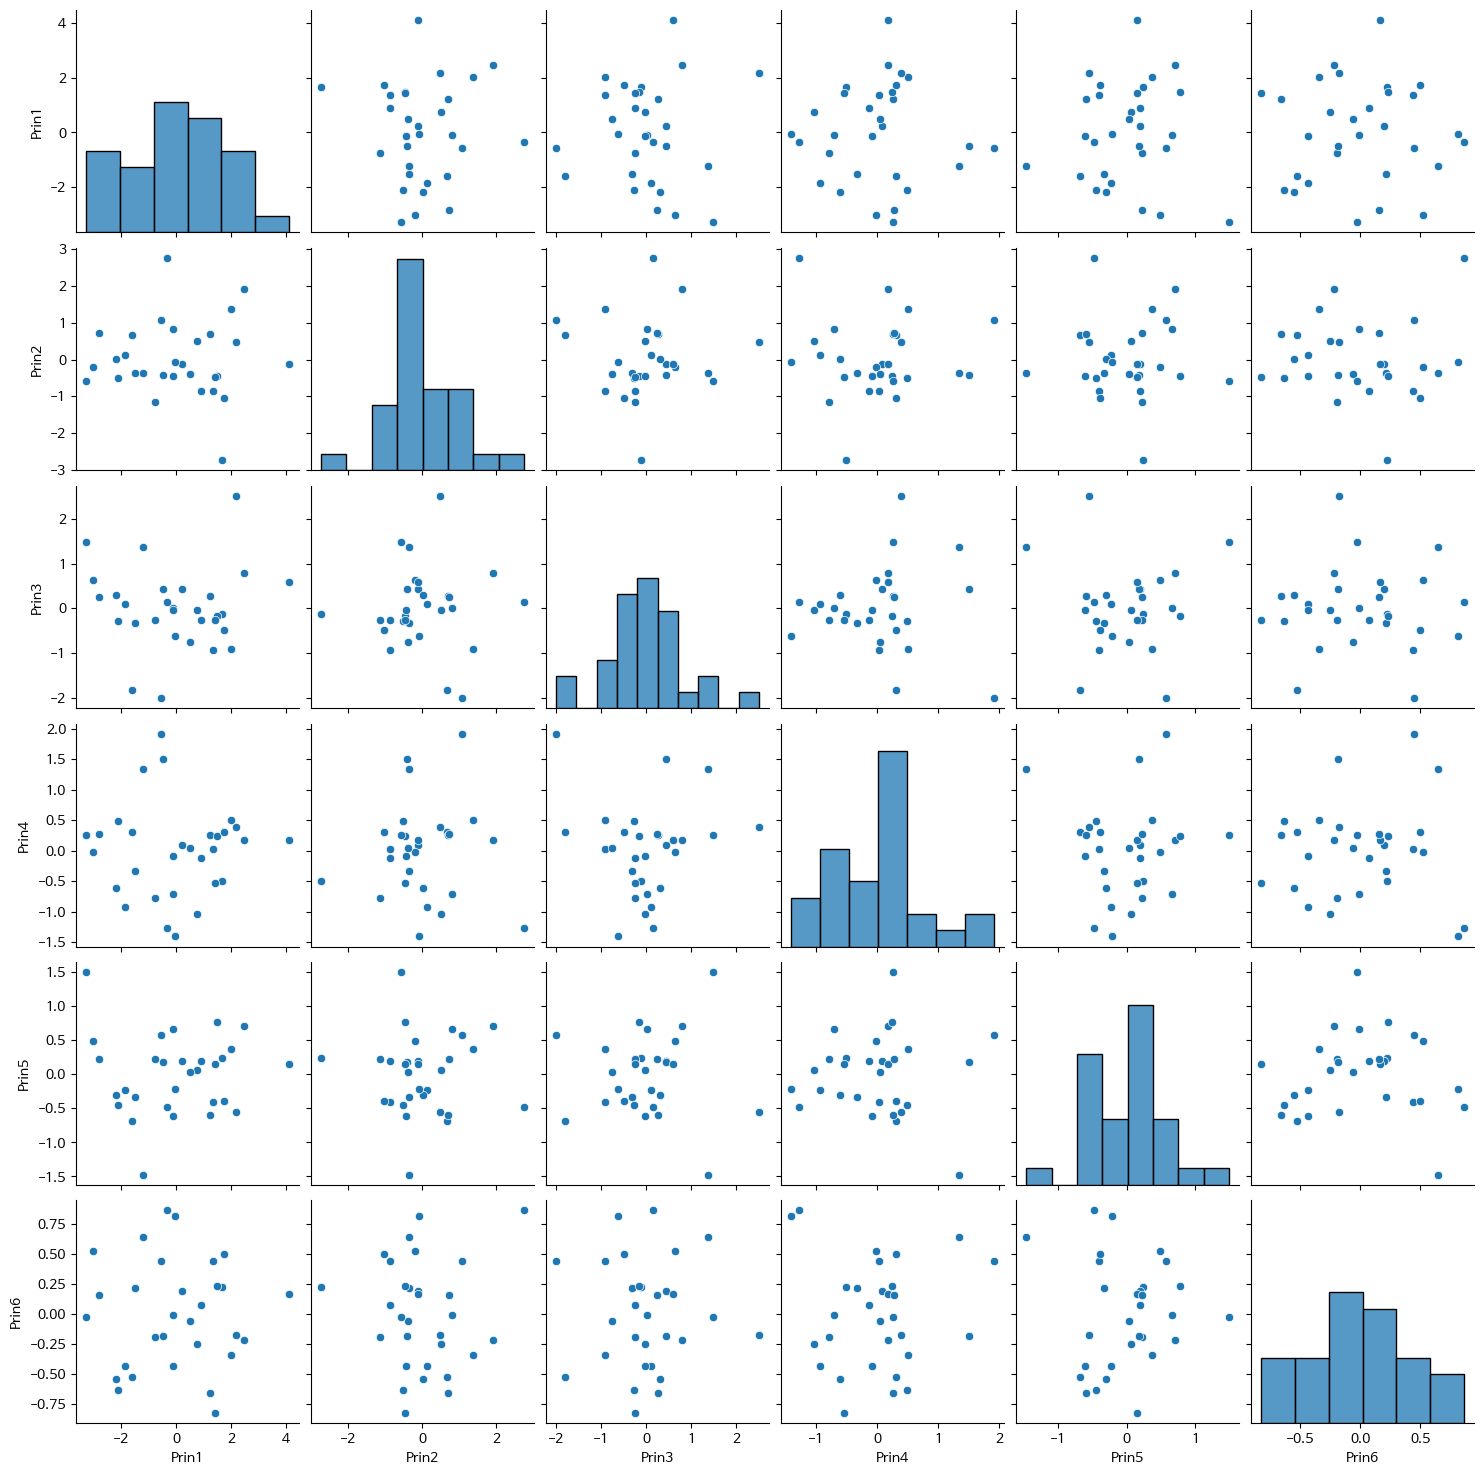

In [21]:
#산점도 행렬
sns.pairplot(df_pca)

In [22]:
#상관관계
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,-0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,0.0,-0.0
Prin5,0.0,0.0,-0.0,0.0,1.0,0.0
Prin6,0.0,0.0,-0.0,-0.0,0.0,1.0


In [23]:
#다중선형 회귀분석: 원천 데이터 활용
#원천 데이터에 절편(const) 추가
df_x_const=sm.add_constant(df_x)
#회귀모델 생성
reg_model=sm.OLS(df_y, df_x_const)
#회귀모델 적합
reg_model = reg_model.fit()
#모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           1.24e-05
Time:                        16:17:27   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [24]:
#다중선형 주성분 회구분석: 주성분 점수(score)데이터 활용
# Eigenvalue, scree plot 기준으로 적정 주성분 선택
x_var=["Prin1","Prin2","Prin3"]
#선택된 주성분 점수 데이터에 절편(const) 컬럼 추가
df_pca_const=sm.add_constant(df_pca[x_var])
#회귀모델 생성
reg_model=sm.OLS(df_y, df_pca_const)
#회귀모델 적합
reg_model=reg_model.fit()
#모델성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           1.02e-05
Time:                        16:17:27   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

## 시계열 분석

In [26]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# import wanrings
# warnings.filterwarnings('ignore')

df=pd.read_csv("환율.csv", parse_dates = ["APPL_DATE"])
df.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize(10,8))
for(ax,idx,currency) in zip([ax1,ax2,ax3], [311,312,313], ["CNY", "JPY", "USD"]):
    ax.plot("APPLE_DATE", "STD_RATE",data = df[df["CURRENCY"]== currency])
    ax.set_ylabel(currency, rotation=0, labelpad=20)

SyntaxError: positional argument follows keyword argument (3749610602.py, line 1)

In [31]:
df_CNY=df[df["CURRENCY"] == "CNY"].set_index("APPL_DATE")
df_CNY.drop(["CURRENCY", "USD_CONV_DATE"], axis=1 , inplace=True)

df_JPY=df[df["CURRENCY"] == "JPY"].set_index("APPL_DATE")
df_JPY.drop(["CURRENCY", "USD_CONV_DATE"], axis=1 , inplace=True)

df_USD=df[df["CURRENCY"] == "USD"].set_index("APPL_DATE")
df_USD.drop(["CURRENCY", "USD_CONV_DATE"], axis=1 , inplace=True)
df_CNY.head()

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94


In [35]:
train_size=0.9
len_idx=len(df_CNY.index)
mask=(np.arange(len_idx) / len_idx) < train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [36]:
df_CNY_train=df_CNY[mask]
df_CNY_test=df_CNY[~mask]
print("shape of train data: {}".format(df_CNY_train.shape))
print("shape of test data: {}".format(df_CNY_test.shape))


shape of train data: (82, 1)
shape of test data: (9, 1)


In [37]:
df_CNY_train=df_CNY[df_CNY.index <="2016-03-22"]
df_CNY_test=df_CNY[df_CNY.index >"2016-03-22"]
df_CNY_test.head()

,STD_RATE
APPL_DATE,
2016-03-23,178.28
2016-03-24,179.68
2016-03-25,179.45
2016-03-26,179.45
2016-03-27,179.45


<AxesSubplot:xlabel='APPL_DATE'>

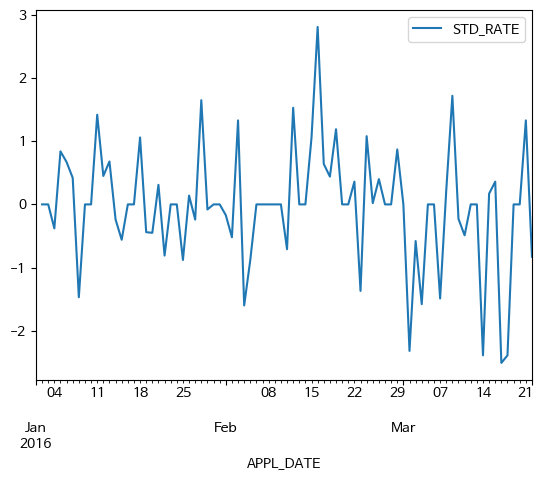

In [38]:
#1차차분
df_CNY_diff1 = df_CNY_train - df_CNY_train.shift(1)
df_CNY_diff1.plot()

<AxesSubplot:xlabel='APPL_DATE'>

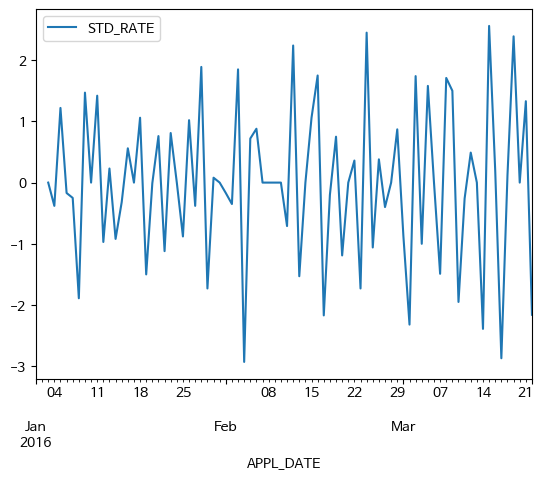

In [39]:
#2차차분
df_CNY_diff2=df_CNY_train -2 * (df_CNY_train.shift(1))+(df_CNY_train.shift(2))
df_CNY_diff2.plot()


/home/piai/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


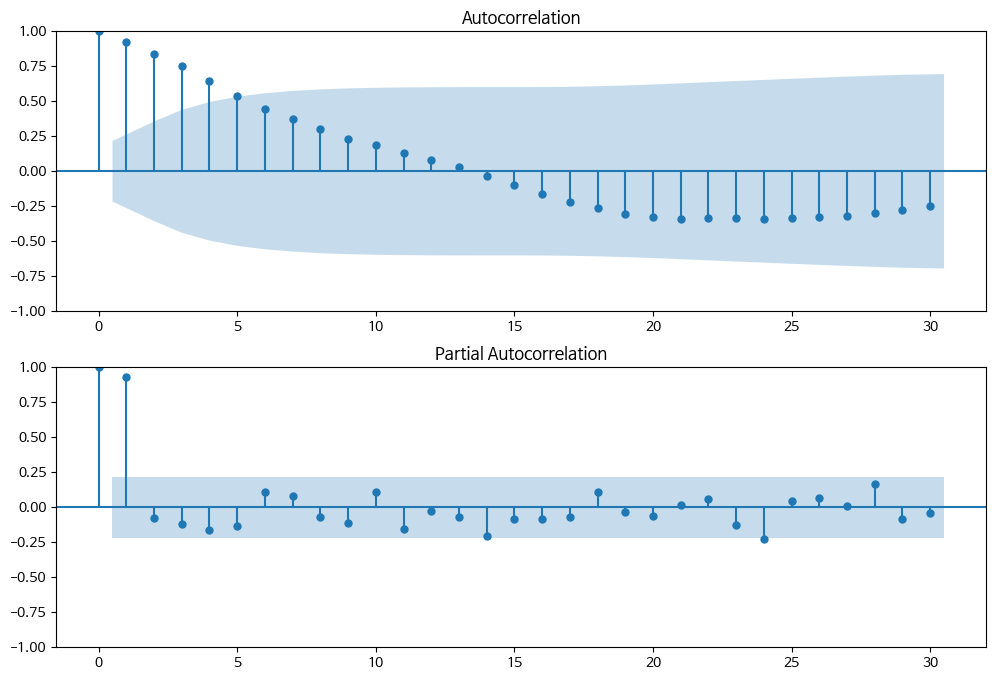

In [40]:
lag_size=30
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df_CNY_train["STD_RATE"], lags=lag_size, ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df_CNY_train["STD_RATE"], lags=lag_size, ax=ax2)

In [42]:
ts_model_cny=ARIMA(df_CNY_train, order=(1,2,0))
ts_result_cny=ts_model_cny.fit()
print(ts_result_cny.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -123.513
Date:                Wed, 01 Mar 2023   AIC                            251.025
Time:                        16:33:10   BIC                            255.790
Sample:                    01-01-2016   HQIC                           252.936
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4389      0.106     -4.146      0.000      -0.646      -0.231
sigma2         1.2805      0.213      6.014      0.000       0.863       1.698
Ljung-Box (L1) (Q):                   2.62   Jarque-

/home/piai/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/piai/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/piai/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


TypeError: Cannot convert input [STD_RATE    176.96
dtype: float64] of type <class 'pandas.core.series.Series'> to Timestamp

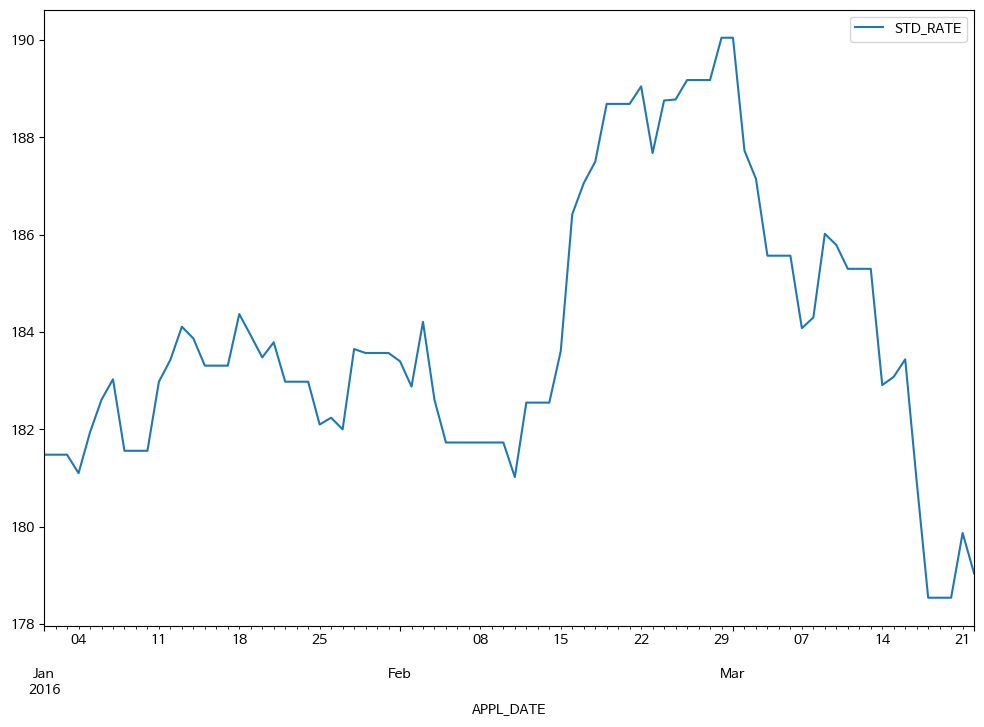

In [45]:
start_time=df_CNY_test.min()
end_time=df_CNY_test.index.max()
fig, ax= plt.subplots(figsize=(12,8))

ax=df_CNY_train.plot(ax=ax)
fig=ts_result_cny.predict(start=start_time, end=end_time,ax=ax, plot_insample=False).plot()

In [46]:
start_time= pd.to_datetime("2016-01-03")
y_pred= ts_result_cny.predict(start=start_time, end=end_time, typ='levels')
df_merge=df_CNY
df_merge["예측값"]=y_pred
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,181.48,NaN
2016-01-02,181.48,NaN
2016-01-03,181.48,181.480126
2016-01-04,181.10,181.480000
2016-01-05,181.94,180.886776


<AxesSubplot:xlabel='APPL_DATE'>

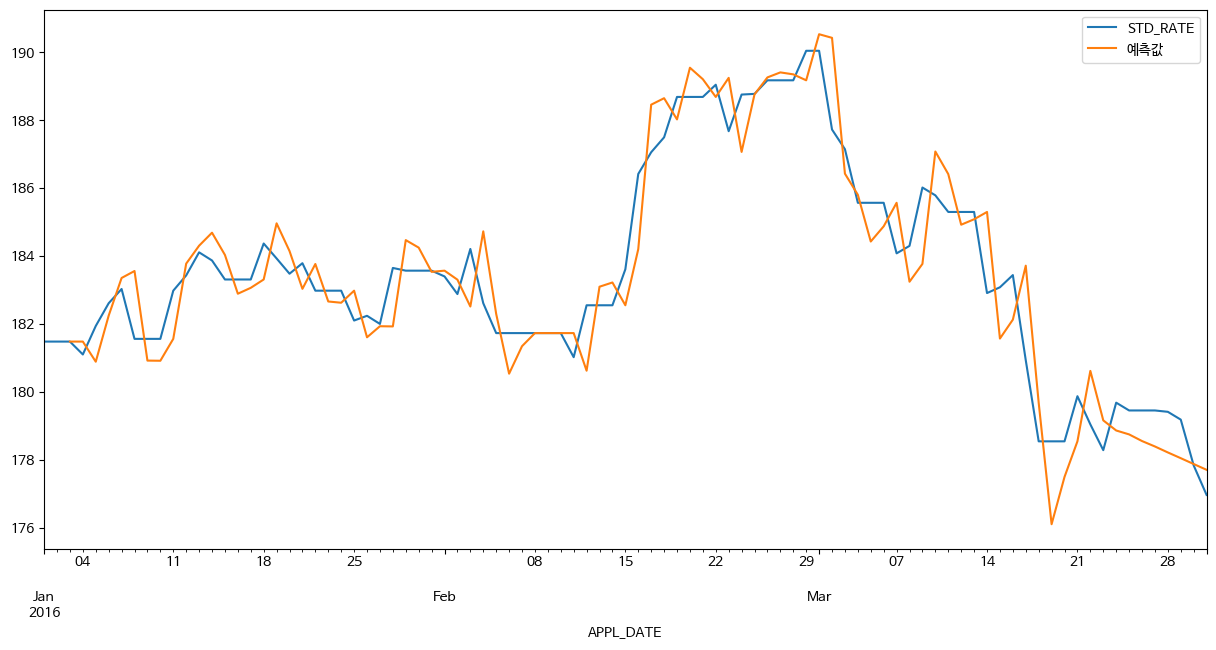

In [48]:
df_merge.plot(y=["STD_RATE","예측값"], figsize=(15,7))

In [49]:
#auto arima
ts_model=auto_arima(df_CNY_train, max_p=3, max_q=3, d=2, trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=228.840, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=265.705, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=251.025, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=223.626, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=225.299, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=225.249, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=226.997, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.583 seconds


In [50]:
ts_model_cny=ARIMA(df_CNY_train, order =(1,2,0))
ts_result_cny=ts_model_cny.fit()
print(ts_result_cny.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -123.513
Date:                Wed, 01 Mar 2023   AIC                            251.025
Time:                        16:38:52   BIC                            255.790
Sample:                    01-01-2016   HQIC                           252.936
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4389      0.106     -4.146      0.000      -0.646      -0.231
sigma2         1.2805      0.213      6.014      0.000       0.863       1.698
Ljung-Box (L1) (Q):                   2.62   Jarque-

/home/piai/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/piai/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/piai/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


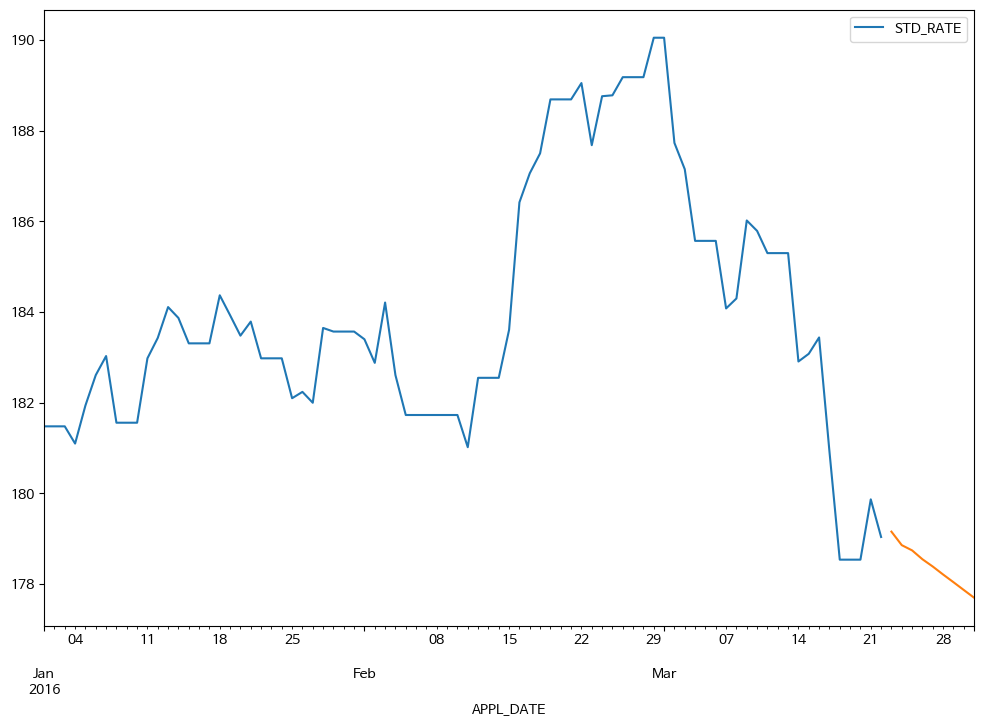

In [51]:
start_time=df_CNY_test.index.min()
end_time=df_CNY_test.index.max()
fig,ax= plt.subplots(figsize=(12,8))
ax=df_CNY_train.plot(ax=ax)
fig=ts_result_cny.predict(start=start_time, end=end_time, ax=ax, plot_insaple=False).plot()

In [52]:
start_time= pd.to_datetime("2016-01-03")
y_pred=ts_result_cny.predict(start=start_time, end=end_time, typ='levels')
df_merge=df_CNY
df_merge["예측값"]=y_pred
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,181.48,NaN
2016-01-02,181.48,NaN
2016-01-03,181.48,181.480126
2016-01-04,181.10,181.480000
2016-01-05,181.94,180.886776
